In [56]:
# Ejercicios con la distribución Gamma.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

In [57]:
path = "../datos/"
fname = "Tabla_A2_ppt_Ithaca.dat"

# Se lee el archivo .dat y se ajusta su formato.
df = pd.read_table(path + fname, names = ["Year", "Precipitation"])
df = df.set_index("Year")

df.head()

,Precipitation
Year,
1933,0.44
1934,1.18
1935,2.69
1936,2.08
1937,3.66


In [58]:
# Ajuste de la precipitación con diferentes métodos

alpha_1 = ( ( df.mean() / df.std() ) ** 2 )[0]
beta_1  = ( df.std() ** 2 / df.mean() )[0]

print("Método de momentos")
print("alpha: " + f"{alpha_1:.3f}")
print("beta:  " + f"{beta_1:.3f}")
print("")


D = ( np.log( df.mean() ) - np.log( df ).sum()
    / df.shape[0] )[0]

alpha_2 = ( 1 + np.sqrt( 1 + 4 * D / 3 ) ) / ( 4 * D )
beta_2  = ( df.mean() / alpha_2 )[0]

print("Método de máxima verosimilitud")
print("alpha: " f"{alpha_2:.3f}")
print("beta:  " f"{beta_2:.3f}")
print("")

# Ajuste de Scipy.
alpha_3, loc_3, beta_3 = stats.gamma.fit(df["Precipitation"])

print("Scipy fit")
print("alpha: " f"{alpha_3:.3f}")
print("beta:  " f"{beta_3:.3f}")
print("loc:  " f"{loc_3:.3f}")
print("")

Método de momentos
alpha: 3.087
beta:  0.635

Método de máxima verosimilitud
alpha: 3.765
beta:  0.521

Scipy fit
alpha: 2.602
beta:  0.651
loc:  0.267



(0.0, 0.63)

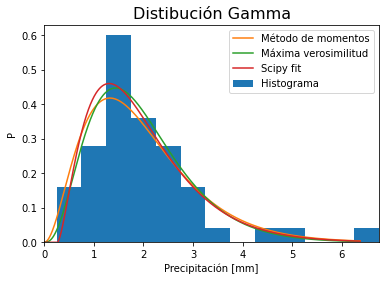

In [59]:
# Grpafica del histograma y de las distribuciones.

fig, ax = plt.subplots()

n, bins, patches = plt.hist( df["Precipitation"],
    bins = np.arange(0.25,
    df["Precipitation"].max() + 0.5, 0.5),
    density = True)

x = np.linspace(0, df["Precipitation"].max(), 1000)
y_1 = stats.gamma.pdf(x, alpha_1, scale = beta_1)
y_2 = stats.gamma.pdf(x, alpha_2, scale = beta_2)
y_3 = stats.gamma.pdf(x, alpha_3, loc_3, beta_3)

ax.plot(x, y_1)
ax.plot(x, y_2)
ax.plot(x, y_3)

ax.set_title("Distibución Gamma",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Método de momentos", "Máxima verosimilitud",
    "Scipy fit", "Histograma"])
ax.set_xlim(0, bins[-1])
ax.set_ylim(0)

Text(0, 0.5, 'P')

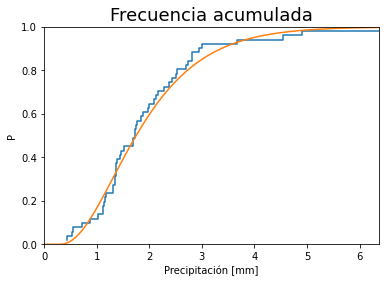

In [60]:
# Frecuencia acumulada empírica y de la distribución.

fig, ax = plt.subplots()

ax.plot(df["Precipitation"].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1),
    drawstyle="steps")

y = stats.gamma.cdf(x, alpha_3, loc_3, beta_3)

ax.plot(x, y)

ax.set_title("Frecuencia acumulada", fontsize = "18")
ax.set_ylim(0, 1)
ax.set_xlim(0, df["Precipitation"].max())
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")

(0.0, 1.05)

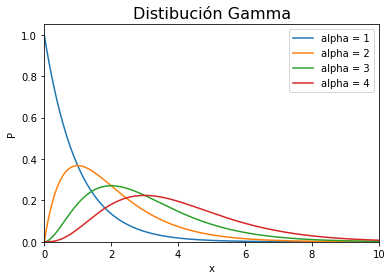

In [61]:
# Distribución Gamma estandarizada con diferentes
# valores de alpha.

fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)
y_1 = stats.gamma.pdf(x, 1)
y_2 = stats.gamma.pdf(x, 2)
y_3 = stats.gamma.pdf(x, 3)
y_4 = stats.gamma.pdf(x, 4)

ax.plot(x, y_1)
ax.plot(x, y_2)
ax.plot(x, y_3)
ax.plot(x, y_4)

ax.set_title("Distibución Gamma",
    fontsize = 16)
ax.set_xlabel("x")
ax.set_ylabel("P")
ax.legend(["alpha = " + str(x) for x in range(1, 5)])
ax.set_xlim(0, 10)
ax.set_ylim(0)